In [9]:
from pyVHR.analysis.testsuite import TestSuite, TestResult
from pyVHR.analysis.stats import StatAnalysis

In [10]:
cfgFilename = '../pyVHR/analysis/default_test_flo.cfg'

test = TestSuite(configFilename=cfgFilename)

test.start(verb=1)

** Run the test with the following config:
      dataset: UBFC2
      methods: ['CHROM', 'GREEN', 'LGI', 'PBV', 'MAP_3DCNN']

**** Using Method: CHROM on videoID: 0


c:\users\florian\appdata\local\programs\python\python38\lib\site-packages\pyVHR\signals\video.py:72: UserWarning:


WARNING!! Requested detector method is different from the saved one





   * Video filename: ../../../3DCNN/UBFC/DATASET_2/subject1\vid.avi
         Total frames: 1533
             Duration: 52.86 (sec)
           Frame rate: 29 (fps)
                Codec: rawvideo
           Num frames: 1533
               Height: 480
                Width: 480
             Detector: 0
            Extractor: 52.863395
      Extracted faces: found! Loading...

    * CHROM params: start time = 0.0, end time = 52.9, winsize = 5.0 (sec)

    * Errors: RMSE = 3.66, MAE = 1.81, MAX = 22.94, PCC = 0.89

**** Using Method: CHROM on videoID: 1

   * Video filename: ../../../3DCNN/UBFC/DATASET_2/subject10\vid.avi
         Total frames: 2023
             Duration: 67.75 (sec)
           Frame rate: 30 (fps)
                Codec: rawvideo
           Num frames: 2023
               Height: 480
                Width: 480
             Detector: 0
            Extractor: 67.747861
      Extracted faces: found! Loading...

    * CHROM params: start time = 0.0, end time = 55.9, winsize =


    * Errors: RMSE = 35.20, MAE = 32.53, MAX = 67.55, PCC = -0.20


c:\users\florian\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:2490: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['MAE', 'MAX', 'PCC', 'RMSE', 'bpmES', 'bpmGT', 'dataset', 'mask',
       'method', 'sigFilename', 'telapse', 'timeES', 'timeGT',
       'videoFilename'],
      dtype='object')]




In [11]:
filename = "./testResults.h5"
# -- object for statistical testing 
st = StatAnalysis(filename)

# -- box plot statistics (medians)
st.displayBoxPlot(metric='MAE',scale='log')
st.displayBoxPlot(metric='PCC')
st.displayBoxPlot(metric='RMSE')

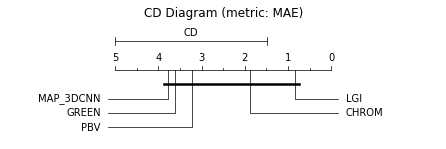

num datasets: 3
stats: 7.820513 -- p-value: 0.098379 -- CD: 3.521541


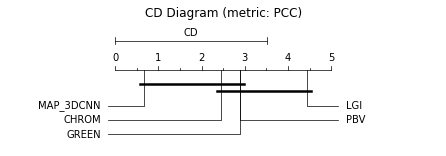

stats: 8.929110 -- p-value: 0.062896 -- CD: 3.521541


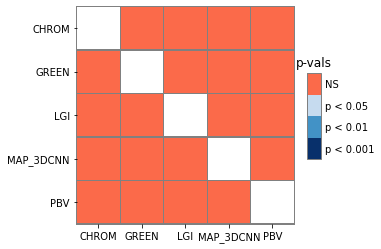

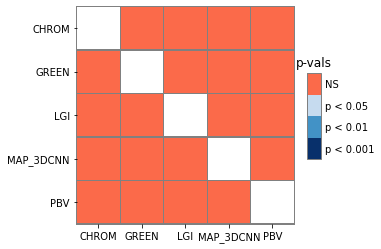

In [12]:
from pyVHR.analysis.testsuite import TestSuite, TestResult
from pyVHR.analysis.stats import StatAnalysis

filename = "./testResults.h5"

# -- object for statistical testing 
st = StatAnalysis(filename)

# -- Friedman & Nemenyi tests for MAE
t,p,ranks,piv,ndataset = st.FriedmanTest(metric='MAE')

# -- critical differences diagram
cd = st.computeCD()
print('num datasets: %d' %ndataset)
print('stats: %f -- p-value: %f -- CD: %f' %(t,p,cd))

# -- Friedman & Nemenyi tests for PCC
t,p,ranks,piv,ndataset = st.FriedmanTest(metric='PCC')

# -- critical differences diagram
cd = st.computeCD()
print('stats: %f -- p-value: %f -- CD: %f' %(t,p,cd))

# -- significance plot
st.SignificancePlot(metric='MAE')
st.SignificancePlot(metric='PCC')